In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("iris_weka_dataset.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(df.columns)
print(df.groupby('flower').size())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')
flower
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DA65AEE788>,
      dtype=object)

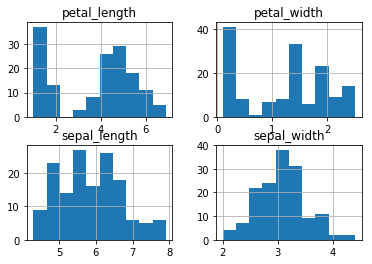

In [6]:
df.hist()


























In [3]:
dfa=df.values


In [10]:
from sklearn import model_selection
array = df.values
 
X = array[:,0:4]
 
Y = array[:,4]
 

 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [11]:
k=3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [18]:
from sklearn import metrics

prediction = neigh.predict(X_train)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, prediction))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))
print(metrics.confusion_matrix(Y_test, yhat))
print(metrics.classification_report(Y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



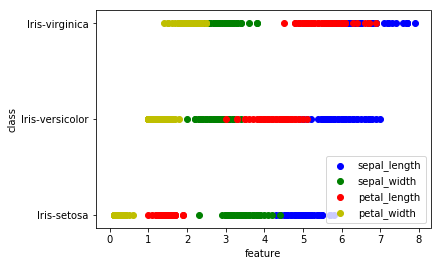

In [24]:
plt.xlabel('feature')
plt.ylabel('class')

x = df.loc[:,'sepal_length']
y = df.loc[:,'flower']
plt.scatter(x,y,color = 'b', label='sepal_length')

x = df.loc[:,'sepal_width']
y = df.loc[:,'flower']
plt.scatter(x,y,color = 'g', label='sepal_width')

x = df.loc[:,'petal_length']
y = df.loc[:,'flower']
plt.scatter(x,y,color = 'r', label='petal_length')

x = df.loc[:,'petal_width']
y = df.loc[:,'flower']
plt.scatter(x,y,color = 'y', label='petal_width')


plt.legend(loc=4)
plt.show()